In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
####################################### Set Axes
def set_axes(ax_list, xlim, ylim):
    for ax in ax_list:
        
        ax.set_ylim(ylim)
        ax.set_xlim(xlim) 
        ax.tick_params(which='major', length=6, width=1.5, direction='out')
        ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='out')  

        y_ax = ax.twinx()
        y_ax.set_ylim(ylim)
        y_ax.set_yticklabels([])
        y_ax.minorticks_on()
        y_ax.tick_params(which='major', length=6, width=1.5, direction='out')
        y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='out')        

        x_ax = ax.twiny()
        x_ax.set_xlim(xlim)
        x_ax.set_xticklabels([])
        x_ax.minorticks_on()
        x_ax.tick_params(which='major', length=6, width=1.0, direction='out')
        x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='out')     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
####################################### Plotting Function

In [3]:
Vx = np.load('VX.npy')
Vy = np.load('VY.npy')
Vz = np.load('VZ.npy')
      
# X = np.load('X.npy')
# Y = np.load('Y.npy')
# Z = np.load('Z.npy')

Density = np.load('D.npy')

(array([1.00000000e+00, 0.00000000e+00, 3.00000000e+00, 1.40000000e+01,
        1.31000000e+02, 5.89000000e+02, 2.86300000e+03, 1.18070000e+04,
        6.20020000e+04, 3.14642000e+05, 7.62200300e+06, 1.25877911e+08,
        2.62875000e+05, 4.43020000e+04, 1.15550000e+04, 4.53500000e+03,
        1.56500000e+03, 4.96000000e+02, 2.01000000e+02, 1.18000000e+02,
        4.10000000e+01, 3.10000000e+01, 1.40000000e+01, 9.00000000e+00,
        8.00000000e+00, 2.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        1.00000000e+00, 4.00000000e+00]),
 array([-3.0896439 , -2.81040978, -2.53117567, -2.25194155, -1.97270743,
        -1.69347332, -1.4142392 , -1.13500508, -0.85577097, -0.57653685,
        -0.29730273, -0.01806862,  0.2611655 ,  0.54039962,  0.81963373,
         1.09886785,  1.37810197,  1.65733608,  1.9365702 ,  2.21580432,
         2.49503843,  2.77427255,  3.05350667,  3.33274078,  3.6119749 ,
         3.89120902,  4.17044313,  4.44967725,  4.72891137,  5.00814548,
         5.28737

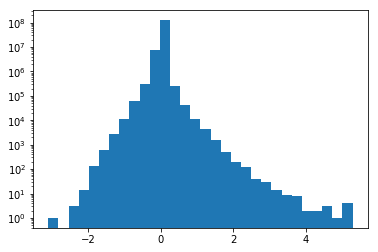

In [4]:
plt.hist(Density, bins=30, log=True)

In [11]:
from matplotlib.colors import LogNorm
from matplotlib import colors

def CF_plot(xy_d, xlabel='SGY [Mpc]', ylabel='SGZ [Mpc]', title='', res = 6, scale=300):

    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.tick_params('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    
    cmap = colors.ListedColormap(['blue', 'royalblue', 'dodgerblue', 'powderblue', 'antiquewhite', 'coral', 'orangered', 'maroon'])
    bounds=[-1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6]
    norm = colors.BoundaryNorm(bounds, cmap.N, clip=True)
    
    image_data = xy_d[:,:,2]
    scale_min = np.min(image_data)
    scale_max = np.max(image_data) 
    
#     image_data[np.where(image_data<=0)] = -1
#     image_data[np.where(image_data>0)] = 1
    
    imgplot = ax.imshow(image_data, cmap=cmap, norm=norm)

    
#     imgplot = ax.imshow(image_data)  
#     imgplot.set_cmap('nipy_spectral')

    ax.set_xlim(206,306)
    ax.set_ylim(206,306)


    Q = ax.quiver(xy_d[::res,::res,3], xy_d[::res,::res,4], xy_d[::res,::res,0], xy_d[::res,::res,1],
                   pivot='mid', units='x', angles='uv', scale=scale, headwidth=5, headlength=6, headaxislength=5)


    ax2 = fig.add_axes([0.09999,0.1,0.8,0.8])
    ax2.patch.set_alpha(0)

    # x = np.linspace(-500,500,50)
    # ax2.plot(x, x, 'r.')

    set_axes([ax2], [-130,130], [-130,130])
    ax2.set_xlabel(xlabel, fontsize=16)
    ax2.set_ylabel(ylabel, fontsize=16)
    ax2.set_title(title, fontsize=16)

    # ax2.tick_params('off')
    # ax2.set_xticklabels([])
    # ax2.set_yticklabels([])
    # ax2.set_xticks([])
    # ax2.set_yticks([])
    
    ax_ = fig.add_axes([0.85,0.1,0.2,0.8])
    ax_.set_axis_off()  
    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.xaxis.set_ticks_position('none')
    ax_.yaxis.set_ticks_position('none')    
    cbar = fig.colorbar(imgplot, extend='both')
    cbar.ax.set_ylabel(r'$Overdensity \/\/ \delta$', fontsize=12, labelpad=-60)
    
    ax.quiverkey(Q, 325, 203.62, 1000, r'$1000 \/ km\/s^{-1}$', coordinates='data', labelsep=0.05)
    return ax2

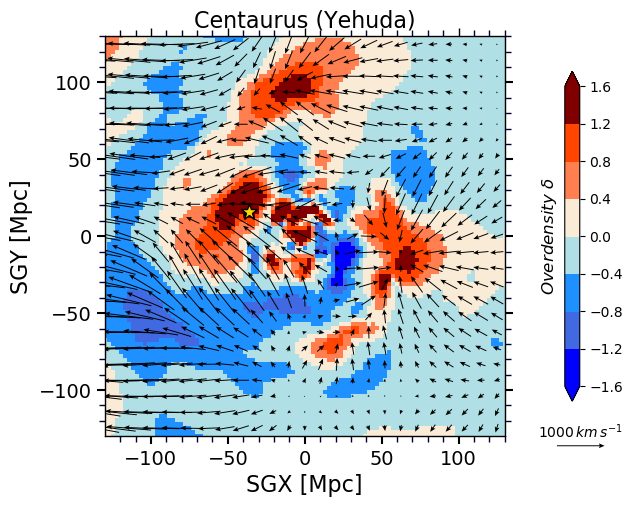

In [12]:
xy_d = np.zeros((512,512,5))
for ii in range(512):
    for jj in  range(512):
        for kk in [253]:             # SGZ =  -8.1 Mpc
            qq=ii*512*512+jj*512+kk
            xy_d[ii,jj,0] += Vx[qq]
            xy_d[ii,jj,1] += Vy[qq]
            xy_d[jj,ii,2] += Density[qq]
        xy_d[ii,jj,3] = ii
        xy_d[ii,jj,4] = jj


ax2 = CF_plot(xy_d, xlabel='SGX [Mpc]', ylabel='SGY [Mpc]', title='Centaurus (Yehuda)',res=4, scale=84)
ax2.plot([-36.3], [16], '*', markersize=12, markerfacecolor='gold', markeredgecolor='k')

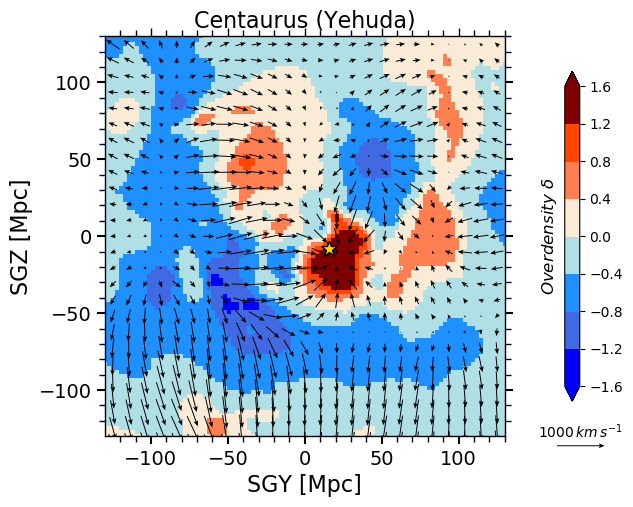

In [13]:
xy_d = np.zeros((512,512,5))
for jj in range(512):
    for kk in  range(512):             
        for ii in [242]:              # SGX = -36.3 Mpc
            qq=ii*512*512+jj*512+kk
            xy_d[jj,kk,0] += Vy[qq]
            xy_d[jj,kk,1] += Vz[qq]
            xy_d[kk,jj,2] += Density[qq]
        xy_d[jj,kk,3] = jj
        xy_d[jj,kk,4] = kk

ax2 = CF_plot(xy_d, xlabel='SGY [Mpc]', ylabel='SGZ [Mpc]', title='Centaurus (Yehuda)', res=4, scale=84)
ax2.plot([16], [-8.1], '*', markersize=12, markerfacecolor='gold', markeredgecolor='k')

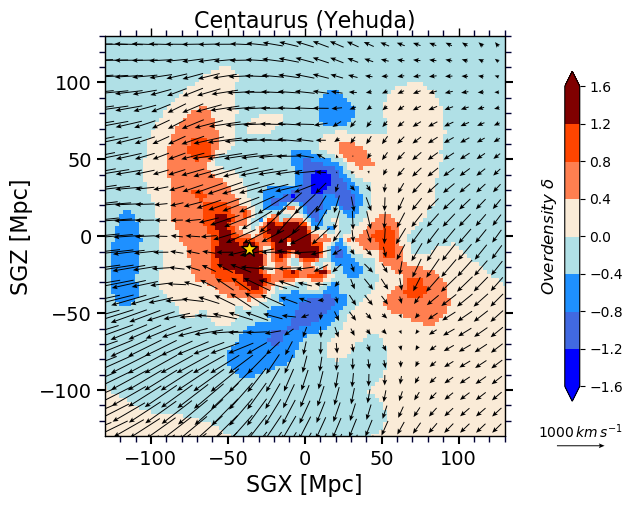

In [14]:
xy_d = np.zeros((512,512,5))
for ii in range(512):
    for kk in  range(512):
#         for jj in [219,220,221]:
        for jj in [262]:            # SGY = 16.0 Mpc
            qq=ii*512*512+jj*512+kk
            xy_d[ii,kk,0] += Vx[qq]
            xy_d[ii,kk,1] += Vz[qq]
            xy_d[kk,ii,2] += Density[qq]
        xy_d[ii,kk,3] = ii
        xy_d[ii,kk,4] = kk

ax2 = CF_plot(xy_d, xlabel='SGX [Mpc]', ylabel='SGZ [Mpc]', title='Centaurus (Yehuda)', res=4, scale=84)
ax2.plot([-36.3], [-8.1], '*', markersize=12, markerfacecolor='gold', markeredgecolor='k')